# 01 Basic Image Manipulation
We will cover:

1.0 Some colab basics

1.1 Basic Operations and Opening Images

1.2 Converting Images to Gragscale

2.3 Image Pixel Brightness Histograms

2.4 Filtering by Convolution

2.5 Thresholding!

2.6 Convolution Challenge


## 1.0 Some Colab Basics

We need to do a few things before we start. First is to mount it to your google drive:

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Next we want to import a few libraries:

- Numpy = Basic numerical computing package for python

- Scipy = More sophisticated numerical computing package with more functions

- Matplotlib = Basic plotting and image display package

- PIL = provides the ability to open image files

In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from PIL import Image as im

## 1.1 Basic Operations and Opening Images

First we introduce numpy arrays. These arrays are basically matricies but can have more than two dimensions, for example images are three dimensional arrays with two dimensions for spatial information and one for spectral information.

We can create a numpy arrays as follows:


In [8]:
vector = np.array([1,2,3,2.5]) # 4x1 1D array
matrix = np.array([[1,2,3,4],[1,2,3,4]]) # 2x4 2D array (matrix)
threedee1 = np.array([[[1,2,3,4],[1,2,3,4]],[[1,2,3,4],[1,2,3,4]]]) # 2x2x4 3D array
threedee2 = np.array([[[4,3,2,1],[1,2,3,4]],[[1,2,3,4],[4,3,2,1]]]) # 2x2x4 3D array
print("Our matrix is ",matrix)

Our matrix is  [[1 2 3 4]
 [1 2 3 4]]


We can add two arrays of the same size just like we add vectors or matrices:

In [11]:
threedee3 = threedee1 + threedee2
print(threedee2)

[[[5 5 5 5]
  [2 4 6 8]]

 [[2 4 6 8]
  [5 5 5 5]]]


We can also perform elementwise multiplication between two arrays of the same size (https://en.wikipedia.org/wiki/Hadamard_product_(matrices)) and multiply arrays by scalars for example:

In [12]:
threedee4 = 2*threedee1*threedee3
print(threedee4)

[[[12 28 48 72]
  [ 6 24 54 96]]

 [[ 6 24 54 96]
  [12 28 48 72]]]


We can also multiply two compatible matricies using the @ symbol as below:

In [13]:
multiply = matrix @ vector
print(multiply)

[24. 24.]


We can access and modify elements of an array be specifying the coordinates of that element in the array. Remember to start counting at 0! So the element of matrix in the first row (row 0) and second column (column 1) can be accessed as follows:

In [15]:
print(matrix[0,1])

2


Likewise we can edit arrays by changing individual elements by using the indicies for example if i want to change the value of coordinate value (0,1,2) in threedee1 to 10 I would do the following:

In [14]:
threedee1[0,1,2] = 10
print(threedee1)

[[[ 1  2  3  4]
  [ 1  2 10  4]]

 [[ 1  2  3  4]
  [ 1  2  3  4]]]


If i want to access a subset of an array i index by "start:(end+1)" and if I want a whole dimension i index by ":". For example if I only want the first row and all columns of only the middle two third dimension layers of threedee1 I use the following code:

In [17]:
print(threedee1[0,:,1:3])

[[ 2  3]
 [ 2 10]]


We can also elementwsie add and (element-wise) exponentiate numpy arrays as follows:

In [30]:
matrix2 = matrix + matrix**2
print(matrix2)

[[ 2  6 12 20]
 [ 2  6 12 20]]


Now we want to open our images using PIL using the PIL.Image function "open". We can use a matplotlib function called imshow to display it once opened.


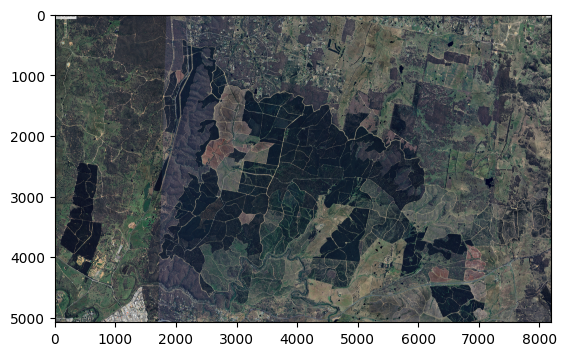

In [18]:
image = im.open("/content/gdrive/MyDrive/EXTN1005B_BushfiresUnit/KowenAndSparrow.jpg") #Taken from google earth
plt.imshow(image)

RGB images are $r\times c\times 3$ arrays, that is they divide the scene into a $r\times c$ grid and assign three values to each point, these being brightnesses for the colors Red Green and Blue as integers from 0 up to 255. Unfortunately PIL only lets us access the data as a big single row list. To get it into a numpy array we can work with easily we we want to find out some key facts about or image:

In [19]:
image_pixel_list = np.array(image.getdata())
(cols,rows) = image.size
print("This image has "+str(rows)+" rows and "+str(cols)+" columns")

This image has 5077 rows and 8192 columns


We can then use this to get our image back to an array that we have called image_array

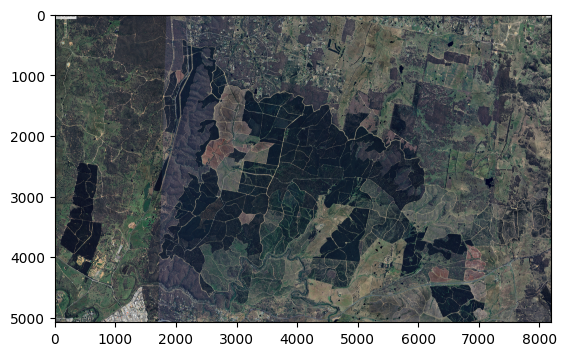

In [20]:
image_array = np.reshape(image_pixel_list,(rows,cols,3))
plt.imshow(image_array)

If you want to access a specific element of a numpy array you give it's coordinates in square brackets after the array name. For example I want to access the Green value at coordinates [1000,1000] meaning I use index [1000,1000,1] (note python starts counting at zero, so the top left corner of the array is at coordinates [0,0]):

In [21]:
print(image_array[1000,1000,1])

71


We might want to ask "what is the maximum brighness of any pixel in the image"

In [22]:
brightest_pixel_value = np.max(image_array)
print("the brightest pixel value is ",brightest_pixel_value)

the brightest pixel value is  255


Now we might want to know where this pixel is:

In [23]:
brightest_pixel_location = np.argmax(image_array)
print("the brightest pixel's location is ",brightest_pixel_location)

the brightest pixel's location is  115153


whoops! that isn't a coordinate!

In [24]:
brightest_pixel_coordinates = np.unravel_index(brightest_pixel_value, np.shape(image_array))
print("the brightest pixel's coordinates are ",brightest_pixel_coordinates)

the brightest pixel's coordinates are  (0, 85, 0)


we can also access sections of an image using ":" notation. For example the RGB image comprised of the rows between 1000 and 2000 is:

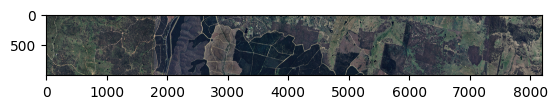

In [26]:
plt.imshow(image_array[1000:2000,:,:])

Can you modify the below code to show me the red channel for the top left 1000x1000 pixels? We will use a red color map. Call me over to check your answer!

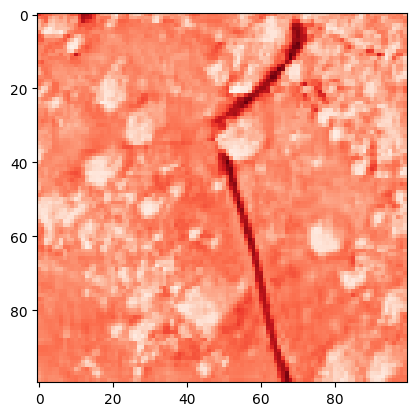

In [25]:
plt.imshow(image_array[2000:2100,100:200,2],cmap='Reds')


We will crop the image to remove the labels:

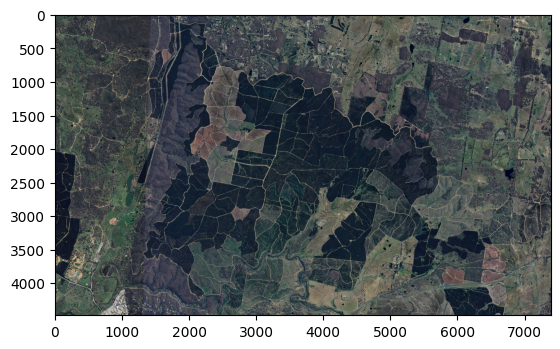

In [27]:
image_array = image_array[400:,400:,:]
image_array = image_array[0:-200,0:-400,:]
plt.imshow(image_array)

We can interrogate the images using brightness histograms

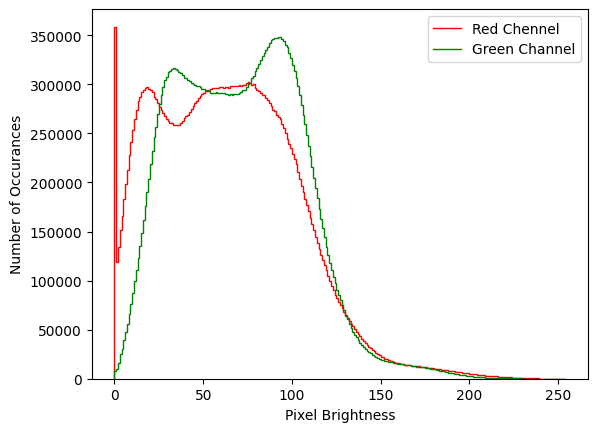

In [28]:
hist_bins = bins=np.arange(0,255,1) # An array [0,1,2,...,255]
(red_vals,red_bins) = np.histogram(image_array[:,:,0], bins=hist_bins)
(green_vals,green_bins) = np.histogram(image_array[:,:,1], bins=hist_bins)
plt.stairs(red_vals,red_bins,color='red')
plt.stairs(green_vals,green_bins,color='green')
plt.xlabel("Pixel Brightness")
plt.ylabel("Number of Occurances")
plt.legend(["Red Chennel","Green Channel"])
plt.show()

Can you use my above code to add the Blue channel to the plot? Show me your answer. What do you think this tells us about the area the satellite has photographed?

In [29]:
# YOUR CODE HERE!!!!!!

In linear algebra a "norm" is a function that gives some sensible notion of "length". You would be familiar with the euclidean norm or as it is more generally called the $l_2$ norm:

$$\|(x_0,x_1,x_2)\|_{l_2}=\sqrt{x_0^2+x_1^2+x_2^2}$$

This notion can be generated to the so called $p$-norm for $l_p$ spaces:

$$\|(x_0,x_1,x_2)\|_{l_p} = (|x_0|^p+|x_1|^p+|x_2|^p)^{1/p}$$

We even have the $\infty$-norm:

$$\|(x_0,x_1,x_2)\|_{l_\infty} = \max(\{|x_0|,|x_1|,|x_2|\})$$

Different norms are useful in different places, for example the $l_1$ norm is a lot easier to compute. Below we use the $l_3$ norm to convert an image to grayscale:

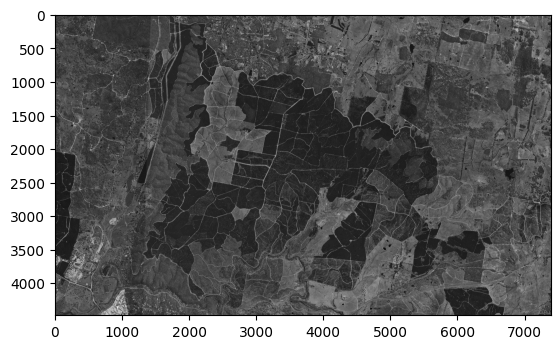

In [31]:
def l3_norm(multichannel_image):
  (rows,cols,channels) = np.shape(multichannel_image)
  powered_image = np.abs(multichannel_image)**3  # elementwise | |^3. NOTE in python exponentiation is done with the ** operator
  normed_image = np.zeros((rows,cols))
  for channel in range(channels):
    normed_image = normed_image + powered_image[:,:,channel] # Performing the elementwise sum | |^3 + | |^3 + | |^3
  normed_image = normed_image**(1/3) # Taking the elementwise third root at the end.
  return normed_image

l3_greyscale_image = l3_norm(image_array) #Apply our norm function

plt.imshow(l3_greyscale_image,cmap="gray") #Display greyscale image

Now by writing your own function "l2_norm" convert image_array to greyscale using the $l_2$ norm and save it to the array l2_greyscale_image. Using np.shape you can verify for yourself l2_greyscale_image has the same number of rows and columns as image_array but has only one channel.

In [32]:
#Modify the following code

def l2_norm(RGB_image):
  return RGB_image

l2_greyscale_image = l3_greyscale_image

Display your image using a Grey cmap:

In [33]:
# Your code here

## 2.4 Filtering By Convolution

Colvolution is an operation we can use to filter images based on their spatial frequency. It involves move a smaller array called a kernel across our image and performing elementwise multiplication and then summing.

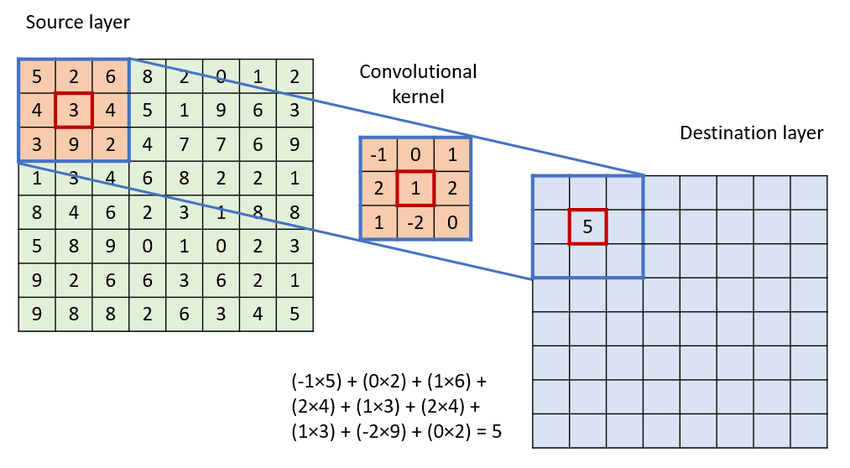

(Podareanu, Damian & Codreanu, Valeriu & Aigner, Sandra & Leeuwen, Caspar & Weinberg, Volker. (2019). Best Practice Guide - Deep Learning. 10.13140/RG.2.2.31564.05769. )

Depending on how we design our kernel we can filter out different "spatial frequencies". Edges or crowds of people will exhibit higher spatial frequencies because the colors change a lot across small groups of pixels whilst a large crop-field will exibhit low spatial frequencies.

https://www.youtube.com/watch?v=C_zFhWdM4ic is a very good explainer of kernel convolution for image filtering (feel free to watch in own time)

See Chapters 5, 6 and 7 of Richards for more information about spatial frequency:
https://anu.primo.exlibrisgroup.com/discovery/fulldisplay?docid=alma991026858153907631&context=L&vid=61ANU_INST:ANU&lang=en&search_scope=MyInst_and_CI&adaptor=Local%20Search%20Engine&tab=Everything&query=any,contains,Remote%20Sensing%20Digital%20Image%20Analysis:%20An%20Introduction&offset=0

First we will try and blur our image, to do this we will use a $21\times 21$ kernel that has values that are distributed as a 2D gaussian with standard deviation 4:

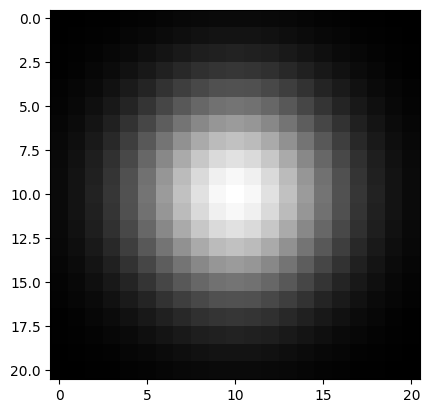

In [34]:
oneD_gaussian = sp.signal.windows.gaussian(21,std=4)  #MODIFY THIS FOR 2.5
gaussian_kernel = np.outer(oneD_gaussian,oneD_gaussian)
plt.imshow(gaussian_kernel,cmap='gray')

It is importamt our kernels have an odd number of rows and columns to properly mach up with our original image. We will use scipy's fftconvolve to perform the convolution on one of our greyscale images:

In [35]:
gaussianblurred_image = sp.signal.fftconvolve(l2_greyscale_image,gaussian_kernel)

The following code shows the difference between the blurred and unblurred images:

Text(0.5, 1.0, 'Unblurred Image')

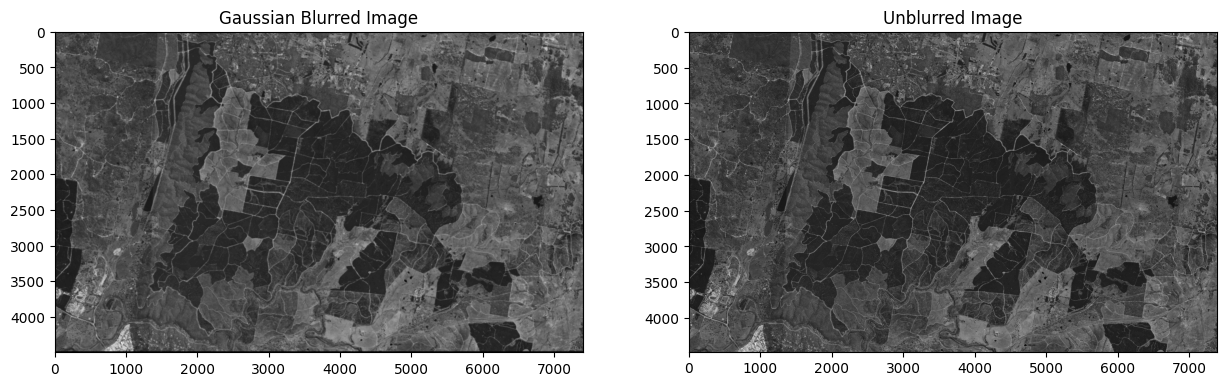

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, layout=None,figsize=(15,20))

ax1.imshow(gaussianblurred_image,cmap='gray')
ax1.set_title("Gaussian Blurred Image")
ax2.imshow(l2_greyscale_image,cmap='gray')
ax2.set_title("Unblurred Image")

We can't see much difference, this is because our kernel is only 21 pixels by 21 pixels so we need to zoom in:

Text(0.5, 1.0, 'Unblurred Image')

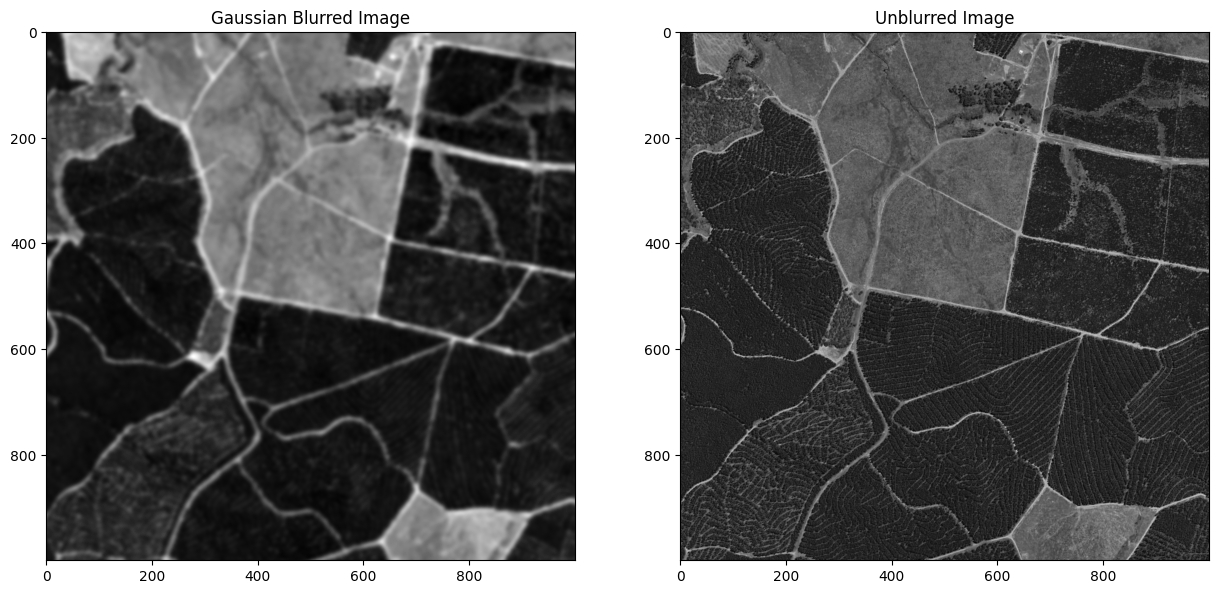

In [36]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, layout=None,figsize=(15,20))

ax1.imshow(gaussianblurred_image[2000:3000,2000:3000],cmap='gray')
ax1.set_title("Gaussian Blurred Image")
ax2.imshow(l2_greyscale_image[2000:3000,2000:3000],cmap='gray')
ax2.set_title("Unblurred Image")

We see high spatial frequency details we might not care about such as the gaps in the rows of trees start to disappear. What if we actually care more about the gaps between the trees? We need a filter that rejects low spatial frequencies such as a sobel kernel. The following is a horizonal sobel kernel that detects horizontal edges in the image:

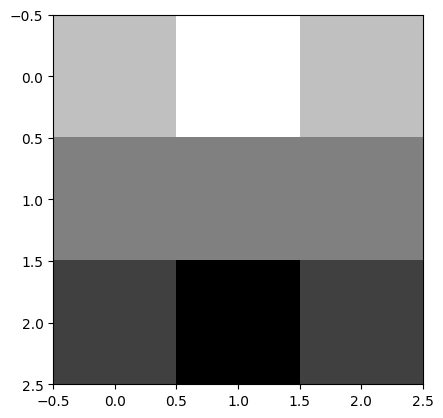

In [37]:
horiz_sobel_kernel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
plt.imshow(horiz_sobel_kernel,cmap='gray')

begause this kernel has negative values or edges will be strong positive or negative values depending on if we are moving from light to dark or dark to light. Thus we will take the absolute value of each pixel after convolution:

Text(0.5, 1.0, 'Original Image')

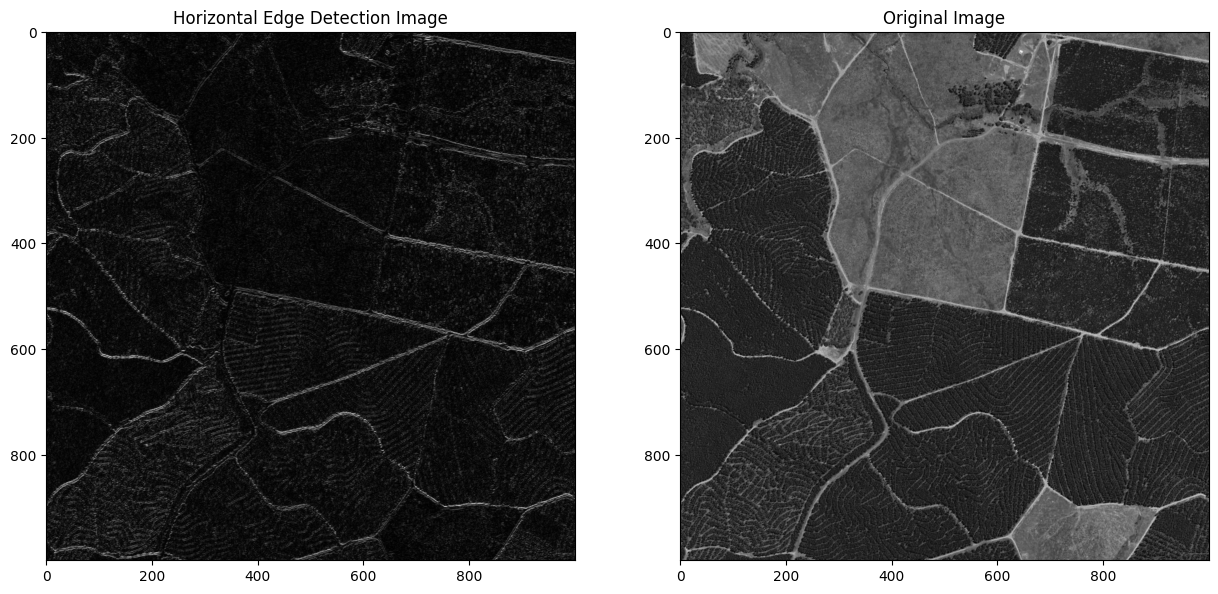

In [39]:
horiz_edges_image = sp.signal.fftconvolve(l2_greyscale_image,horiz_sobel_kernel) #MODIFY THIS FOR 2.5
horiz_edges_image = np.abs(horiz_edges_image)

fig, (ax3,ax4) = plt.subplots(nrows=1, ncols=2, layout=None,figsize=(15,20))

ax3.imshow(horiz_edges_image[2000:3000,2000:3000],cmap='gray')
ax3.set_title("Horizontal Edge Detection Image")
ax4.imshow(l2_greyscale_image[2000:3000,2000:3000],cmap='gray')
ax4.set_title("Original Image")

Notice how the horizontal edges in the image are brought out! Now try yourself to use a vertical sobel kernel (hint: transpose the horizontal sobel kernel) to detect the vertical edges!

Text(0.5, 1.0, 'Vertical Edge Detection Image')

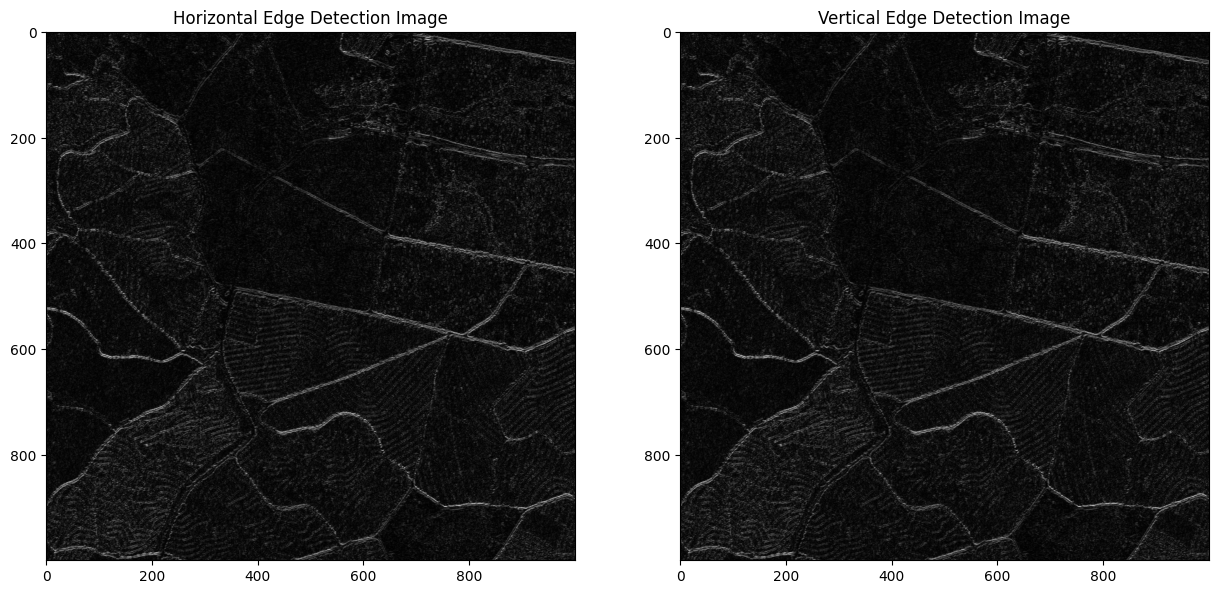

In [40]:
vert_sobel_kernel = horiz_sobel_kernel #MODIFY THIS!!!!
vert_edges_image = horiz_edges_image #MODIFY THIS!!!!

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, layout=None,figsize=(15,20))
ax1.imshow(horiz_edges_image[2000:3000,2000:3000],cmap='gray')
ax1.set_title("Horizontal Edge Detection Image")
ax2.imshow(vert_edges_image[2000:3000,2000:3000],cmap='gray')
ax2.set_title("Vertical Edge Detection Image")

We can treat these two images as channels of the same image and then combine them together with a norm to get a combined image which shows both horizonal and vertical edges! Here I use the $l_1$ norm (with a normalisation constant) because it is really easy!

Text(0.5, 1.0, 'Unblurred Image')

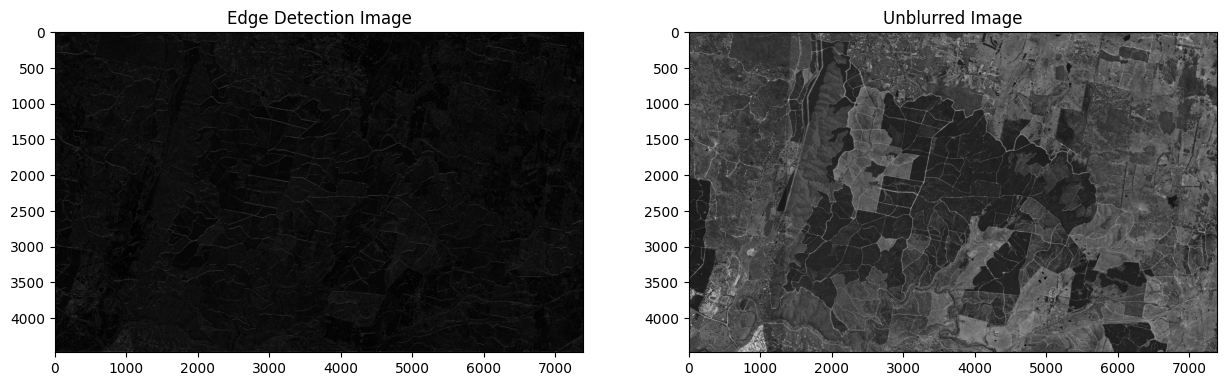

In [44]:
edges_image = (horiz_edges_image + vert_edges_image)/2

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, layout=None,figsize=(15,20))
ax1.imshow(edges_image,cmap='gray')
ax1.set_title("Edge Detection Image")
ax2.imshow(l2_greyscale_image,cmap='gray')
ax2.set_title("Unblurred Image")


## 2.5 Thresholding

What if we think some edges are more important than others? Well we can perform thresholding to send some values to zero and others to 1 to create a bitmap image such that 0 = no edge and 1 = edge. We do this by applying a thresholding function $T_t$ to each pixel:

$$T_t(x)=\begin{cases}0 & \text{if }x<t\\1 & \text{if }x\geq t\\ \end{cases}$$

Histograms are useful in choosing the threshold value $t$

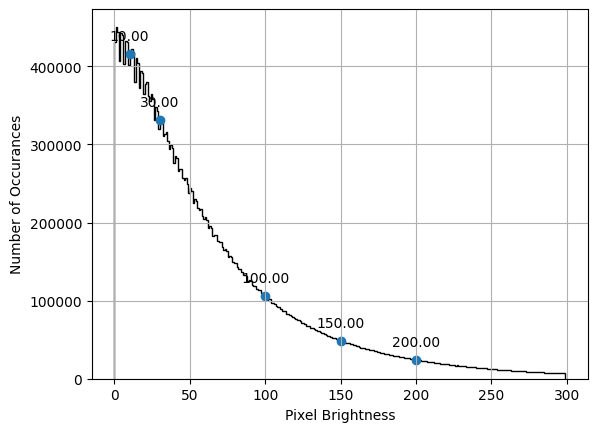

In [51]:
thresholds = [10,30,100,150,200]

hist_bins = bins=np.arange(0,300,1) # An array [0,1,2,...,255]
(vals,bins) = np.histogram(edges_image, bins=hist_bins)
plt.stairs(vals,bins,color='black')
plt.xlabel("Pixel Brightness")
plt.ylabel("Number of Occurances")
plt.scatter(thresholds,vals[thresholds])
plt.grid()
for x,y in zip(thresholds,vals[thresholds]):
    label = "{:.2f}".format(np.round(x))
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')

Lets see what the images look like for each of these threshold values:

In [52]:
t10_image = edges_image > 10
t30_image = edges_image > 30
t100_image = edges_image > 100
t150_image = edges_image > 150
t200_image = edges_image > 200

In [53]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, layout=None,figsize=(15,20))
ax1.imshow(l2_greyscale_image[2000:3000,2000:3000],cmap='gray')
ax1.set_title("Original Image")
ax2.imshow(t10_image[2000:3000,2000:3000],cmap='gray')
ax2.set_title("Threshold = 10")
ax3.imshow(t30_image[2000:3000,2000:3000],cmap='gray')
ax3.set_title("Threshold = 30")
ax4.imshow(t100_image[2000:3000,2000:3000],cmap='gray')
ax4.set_title("Threshold = 100")
ax5.imshow(t150_image[2000:3000,2000:3000],cmap='gray')
ax5.set_title("Threshold = 150")
ax6.imshow(t200_image[2000:3000,2000:3000],cmap='gray')
ax6.set_title("Threshold = 200")

Output hidden; open in https://colab.research.google.com to view.

Hrmm, this really brings out features like roads but also features like tree-rows like we might not care about! It's keeping a lot of that high spatial-frequency information like the tree rows! Go back and try this edge detection method on the gaussian-blurred image and see what happens! Tune the gaussian blur kernel to be bigger (try 31x31 with a std of 6). This way we get rid of the very high frequency information like tree-rows but keep the roads.

In [55]:
# Go back and edit the code

# 2.6 Convolution Challenge

Attempt this after doing at least 02 LiDAR Challenge if yoiu think challenges 03 and 04 are too much for you. Write a function that performs 2D convolution from scratch using only numpy but do it the naieve way (dont use any fast-fourier-transforms). You will need to think about what to do in the edge cases. (https://www.youtube.com/watch?v=C_zFhWdM4ic is a very good explainer of kernel convolution)

In [56]:
def my_conv(image,kernel):

  convolved_image = np.array([0]) #Your code here

  return convolved_image